In [12]:
import numpy as np
from datascience import *
# These lines do some fancy plotting magic.\n",

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [13]:
nfa_all = Table.read_table("NFA 2018.csv")
nfa_all.show(10)


country,ISO alpha-3 code,UN_region,UN_subregion,year,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,Percapita GDP (2010 USD),population
Armenia,ARM,Asia,Western Asia,1992,BiocapPerCap,0.161129,0.135023,0.0838355,0.013718,0.0336685,0,0.427374,949.033,3449000
Armenia,ARM,Asia,Western Asia,1992,BiocapTotGHA,555813,465763,289191,47320.2,116140,0,1.47423e+06,949.033,3449000
Armenia,ARM,Asia,Western Asia,1992,EFConsPerCap,0.390923,0.189137,1.25e-06,0.00413764,0.0336685,1.11223,1.73009,949.033,3449000
Armenia,ARM,Asia,Western Asia,1992,EFConsTotGHA,1.34849e+06,652429,4.32784,14272.8,116140,3.83662e+06,5.96795e+06,949.033,3449000
Armenia,ARM,Asia,Western Asia,1992,EFExportsPerCap,0.00112491,0.00228304,0,0.000438381,0,0.0481904,0.0520368,949.033,3449000
Armenia,ARM,Asia,Western Asia,1992,EFExportsTotGHA,3880.38,7875.33,0,1512.2,0,166233,179501,949.033,3449000
Armenia,ARM,Asia,Western Asia,1992,EFImportsPerCap,0.230919,0.0563969,1.25e-06,0.00331238,0,0.0879112,0.378541,949.033,3449000
Armenia,ARM,Asia,Western Asia,1992,EFImportsTotGHA,796555,194541,4.32784,11426.1,0,303250,1.30578e+06,949.033,3449000
Armenia,ARM,Asia,Western Asia,1992,EFProdPerCap,0.161129,0.135023,0,0.00126364,0.0336685,1.0725,1.40359,949.033,3449000
Armenia,ARM,Asia,Western Asia,1992,EFProdTotGHA,555813,465763,0,4358.94,116140,3.6996e+06,4.84168e+06,949.033,3449000


country,ISO alpha-3 code,UN_region,UN_subregion,year,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,Percapita GDP (2010 USD),population
Armenia,ARM,Asia,Western Asia,1992,EFConsPerCap,0.390923,0.189137,1.25e-06,0.00413764,0.0336685,1.11223,1.73009,949.033,3449000
Armenia,ARM,Asia,Western Asia,1992,EFConsTotGHA,1.34849e+06,652429,4.32784,14272.8,116140,3.83662e+06,5.96795e+06,949.033,3449000
Armenia,ARM,Asia,Western Asia,1992,EFExportsPerCap,0.00112491,0.00228304,0,0.000438381,0,0.0481904,0.0520368,949.033,3449000
Armenia,ARM,Asia,Western Asia,1992,EFExportsTotGHA,3880.38,7875.33,0,1512.2,0,166233,179501,949.033,3449000
Armenia,ARM,Asia,Western Asia,1992,EFImportsPerCap,0.230919,0.0563969,1.25e-06,0.00331238,0,0.0879112,0.378541,949.033,3449000
Armenia,ARM,Asia,Western Asia,1992,EFImportsTotGHA,796555,194541,4.32784,11426.1,0,303250,1.30578e+06,949.033,3449000
Armenia,ARM,Asia,Western Asia,1992,EFProdPerCap,0.161129,0.135023,0,0.00126364,0.0336685,1.0725,1.40359,949.033,3449000
Armenia,ARM,Asia,Western Asia,1992,EFProdTotGHA,555813,465763,0,4358.94,116140,3.6996e+06,4.84168e+06,949.033,3449000
Armenia,ARM,Asia,Western Asia,1993,EFConsPerCap,0.386611,0.200749,1.07e-05,0.00381586,0.0319676,0.535277,1.15843,886.033,3370000
Armenia,ARM,Asia,Western Asia,1993,EFConsTotGHA,1.30275e+06,676459,36.0341,12858.2,107720,1.80371e+06,3.90353e+06,886.033,3370000


In [30]:
#datacleaning
one = nfa_all.drop("ISO alpha-3 code", "UN_subregion", "crop_land", "forest_land", "fishing_ground", "grazing_land" "built_up_land", "total" )
two = one.where("record", "EFConsPerCap")
three = two.where("year", 2014)

four = three.where("carbon", are.not_equal_to(np.nan))
four



country,UN_region,year,record,grazing_land,built_up_land,carbon,Percapita GDP (2010 USD),population
Armenia,Asia,2014,EFConsPerCap,0.224414,0.0615559,0.851708,3827.34,3006000
Afghanistan,Asia,2014,EFConsPerCap,0.186871,0.046125,0.154883,610.242,31628000
Albania,Europe,2014,EFConsPerCap,0.238944,0.0397723,0.897237,4413.56,2890000
Algeria,Africa,2014,EFConsPerCap,0.183246,0.0280628,1.46621,4675.89,38934000
Angola,Africa,2014,EFConsPerCap,0.0959564,0.0472581,0.774421,3747.57,24228000
Antigua and Barbuda,Latin America and the Caribbean,2014,EFConsPerCap,nan,nan,nan,12403.5,91000
Argentina,Latin America and the Caribbean,2014,EFConsPerCap,0.842534,0.105009,1.28105,10323.2,42980000
Australia,Oceania,2014,EFConsPerCap,0.45846,0.06337,4.70007,54394.3,23622000
Austria,Europe,2014,EFConsPerCap,0.252585,0.151162,3.88546,47886.6,8517000
Bahamas,Latin America and the Caribbean,2014,EFConsPerCap,0.943477,0.0423996,2.68489,21078.7,383000


In [31]:
#econlevels
four.column("Percapita GDP (2010 USD)")

low = percentile(25, four.column("Percapita GDP (2010 USD)"))
low_middle = percentile(50, four.column("Percapita GDP (2010 USD)"))

high_middle = percentile(75, four.column("Percapita GDP (2010 USD)"))
high = percentile(100, four.column("Percapita GDP (2010 USD)"))



In [33]:
#splitting country by econ levels
lowcountries = four.where("Percapita GDP (2010 USD)", are.below(low))
lowmiddlecountries = four.where("Percapita GDP (2010 USD)", are.between(low, low_middle))
highmiddlecountries = four.where("Percapita GDP (2010 USD)", are.between(low_middle, high_middle))
highcountries = four.where("Percapita GDP (2010 USD)", are.between(high_middle, high))


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

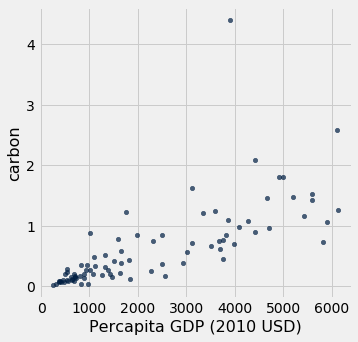

In [48]:
#low scatter


lowcountries.scatter("Percapita GDP (2010 USD)", "carbon")





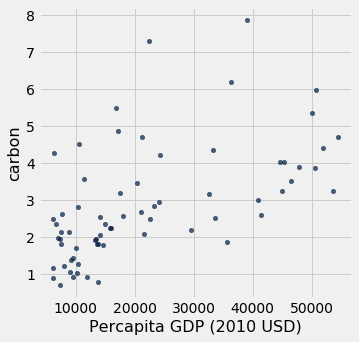

In [49]:
#lowmiddle scatter
lowmiddlecountries.scatter("Percapita GDP (2010 USD)", "carbon")


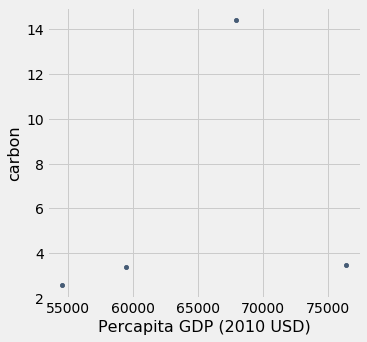

In [50]:
#highmiddle scatter
highmiddlecountries.scatter("Percapita GDP (2010 USD)", "carbon")


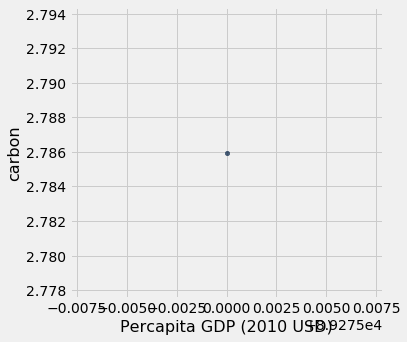

In [51]:
#high scatter
highcountries.scatter("Percapita GDP (2010 USD)", "carbon")


In [ ]:
#scatter plot of all countries

four.scatter("Percapita GDP (2010 USD)", "carbon")

